In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [198]:
data = pd.read_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/retuns.csv')
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
etf_returns = data.iloc[:, :6]
future_returns = data.iloc[:, 6:12]
risk_free_rate = data.iloc[:, 12:]
data = data.fillna(method='ffill')
data


,BILS,USFR,BIL,SGOV,IED,TLT,WN,FV,SFR,TU,TY,US,Rf
Date,,,,,,,,,,,,,
2021-01-11,-0.000016,0.000008,-0.000007,0.000002,-0.002022,-0.002875,-0.002769,-0.000622,0.000000,-0.000106,-0.001715,-0.002407,0.000004
2021-01-12,0.000005,-0.000025,-0.000004,0.000006,-0.000688,-0.001470,-0.001697,-0.000249,-0.000050,-0.000071,-0.000229,-0.000928,0.000003
2021-01-13,-0.000026,0.000066,-0.000003,0.000004,0.003780,0.012519,0.013133,0.001058,0.000050,0.000000,0.002749,0.007061,0.000003
2021-01-14,0.000030,-0.000079,0.000007,0.000004,-0.002304,-0.009711,-0.010523,-0.000311,0.000000,0.000035,-0.001485,-0.006827,0.000003
2021-01-15,-0.000006,0.000023,-0.000007,0.000002,0.002408,0.003963,0.004007,0.001120,0.000000,0.000177,0.002174,0.003530,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.000111,-0.004342,0.000139,0.000142,-0.003852,-0.006358,-0.004769,-0.002282,-0.000735,-0.001111,-0.002715,-0.003726,0.000211
2024-05-24,0.000568,0.000068,0.000572,0.000583,0.001116,0.002518,0.000504,-0.000369,-0.000210,-0.000422,-0.000143,0.000000,0.000211
2024-05-28,0.000110,0.000637,0.000137,0.000140,-0.004939,-0.013732,-0.013360,-0.001919,-0.000315,-0.000345,-0.003727,-0.009351,0.000211


In [199]:
z_scores = data.apply(zscore)
data = data[(np.abs(z_scores) <= 3).all(axis=1)]
data

,BILS,USFR,BIL,SGOV,IED,TLT,WN,FV,SFR,TU,TY,US,Rf
Date,,,,,,,,,,,,,
2021-01-11,-0.000016,0.000008,-0.000007,0.000002,-0.002022,-0.002875,-0.002769,-0.000622,0.000000,-0.000106,-0.001715,-0.002407,0.000004
2021-01-12,0.000005,-0.000025,-0.000004,0.000006,-0.000688,-0.001470,-0.001697,-0.000249,-0.000050,-0.000071,-0.000229,-0.000928,0.000003
2021-01-13,-0.000026,0.000066,-0.000003,0.000004,0.003780,0.012519,0.013133,0.001058,0.000050,0.000000,0.002749,0.007061,0.000003
2021-01-14,0.000030,-0.000079,0.000007,0.000004,-0.002304,-0.009711,-0.010523,-0.000311,0.000000,0.000035,-0.001485,-0.006827,0.000003
2021-01-15,-0.000006,0.000023,-0.000007,0.000002,0.002408,0.003963,0.004007,0.001120,0.000000,0.000177,0.002174,0.003530,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.000111,-0.004342,0.000139,0.000142,-0.003852,-0.006358,-0.004769,-0.002282,-0.000735,-0.001111,-0.002715,-0.003726,0.000211
2024-05-24,0.000568,0.000068,0.000572,0.000583,0.001116,0.002518,0.000504,-0.000369,-0.000210,-0.000422,-0.000143,0.000000,0.000211
2024-05-28,0.000110,0.000637,0.000137,0.000140,-0.004939,-0.013732,-0.013360,-0.001919,-0.000315,-0.000345,-0.003727,-0.009351,0.000211


In [200]:
# Store month attribute of the day
data['month'] = data.index.month 

# Compare current day's month attribute with next day's month attribute

# The last data entry is dropped due to the NaN value after shift(-1)
data['is_last_day'] = data.month!= data.month.shift(-1)
#   data = data[:-1]

# Store the last date of the month
data['last_date_of_month'] = np.where(data.is_last_day, data.index.day, np.nan) 
data.last_date_of_month = data.last_date_of_month.fillna(method='bfill')
data['days_since_last_day'] = data.index.day - data.last_date_of_month
data.dropna(inplace=True)

data.head()

/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/1000846516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data.index.month
/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/1000846516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_last_day'] = data.month!= data.month.shift(-1)
/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/1000846516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,BILS,USFR,BIL,SGOV,IED,TLT,WN,FV,SFR,TU,TY,US,Rf,month,is_last_day,last_date_of_month,days_since_last_day
Date,,,,,,,,,,,,,,,,,
2021-01-11,-0.000016,0.000008,-0.000007,0.000002,-0.002022,-0.002875,-0.002769,-0.000622,0.00000,-0.000106,-0.001715,-0.002407,0.000004,1,False,29.0,-18.0
2021-01-12,0.000005,-0.000025,-0.000004,0.000006,-0.000688,-0.001470,-0.001697,-0.000249,-0.00005,-0.000071,-0.000229,-0.000928,0.000003,1,False,29.0,-17.0
2021-01-13,-0.000026,0.000066,-0.000003,0.000004,0.003780,0.012519,0.013133,0.001058,0.00005,0.000000,0.002749,0.007061,0.000003,1,False,29.0,-16.0
2021-01-14,0.000030,-0.000079,0.000007,0.000004,-0.002304,-0.009711,-0.010523,-0.000311,0.00000,0.000035,-0.001485,-0.006827,0.000003,1,False,29.0,-15.0
2021-01-15,-0.000006,0.000023,-0.000007,0.000002,0.002408,0.003963,0.004007,0.001120,0.00000,0.000177,0.002174,0.003530,0.000003,1,False,29.0,-14.0


In [201]:
data['signal'] = np.where(data.days_since_last_day >= -6, 1, 0)
returns = data[inst_list].mul(data['signal'], axis=0)
returns.head()

/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/3125496596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data.days_since_last_day >= -6, 1, 0)


,BILS,USFR,BIL,SGOV,IED,TLT
Date,,,,,,
2021-01-11,-0.0,0.0,-0.0,0.0,-0.0,-0.0
2021-01-12,0.0,-0.0,-0.0,0.0,-0.0,-0.0
2021-01-13,-0.0,0.0,-0.0,0.0,0.0,0.0
2021-01-14,0.0,-0.0,0.0,0.0,-0.0,-0.0
2021-01-15,-0.0,0.0,-0.0,0.0,0.0,0.0


In [202]:
# Calculate cumulative strategy returns
cumulative_strategy_returns = ((returns + 1).cumprod())

# Calculate strategy returns
total_strategy_returns = (cumulative_strategy_returns.iloc[-1]-1)*100

total_strategy_returns

BILS    1.912288
USFR    3.845808
BIL     1.906214
SGOV    2.051983
IED     0.976161
TLT    -1.706299
Name: 2024-05-30 00:00:00, dtype: float64

In [196]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
cagr = (cumulative_strategy_returns.iloc[-1]**(252/days)-1)*100

print('The CAGR from strategy is')
cagr

The CAGR from strategy is


BILS    0.594739
USFR    1.188338
BIL     0.592862
SGOV    0.637884
IED     0.304562
TLT    -0.537307
Name: 2024-05-30 00:00:00, dtype: float64

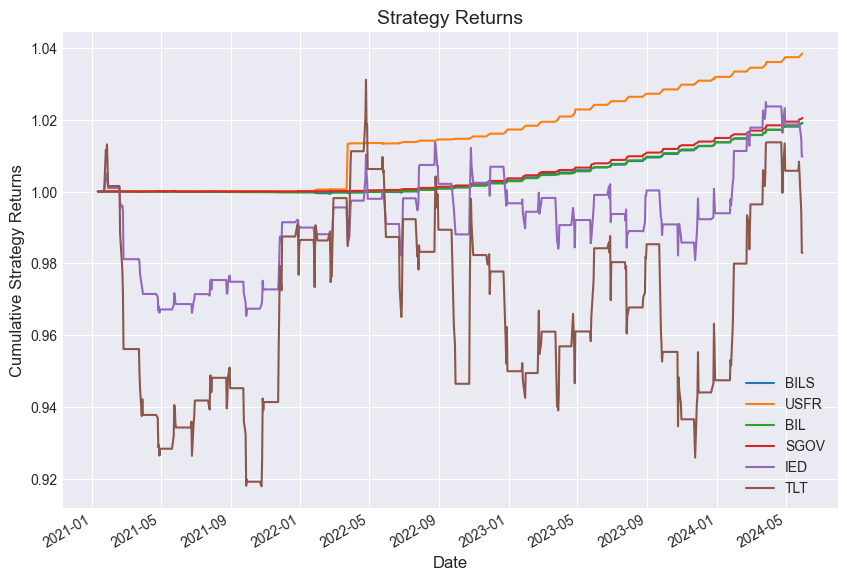

In [197]:
# Plot cumulative strategy returns
cumulative_strategy_returns.plot(figsize=(10, 7))

# Define label for the title of the figure
plt.title('Strategy Returns', fontsize=14)

# Define labels for x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Strategy Returns', fontsize=12)

plt.show()

/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/3614353149.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


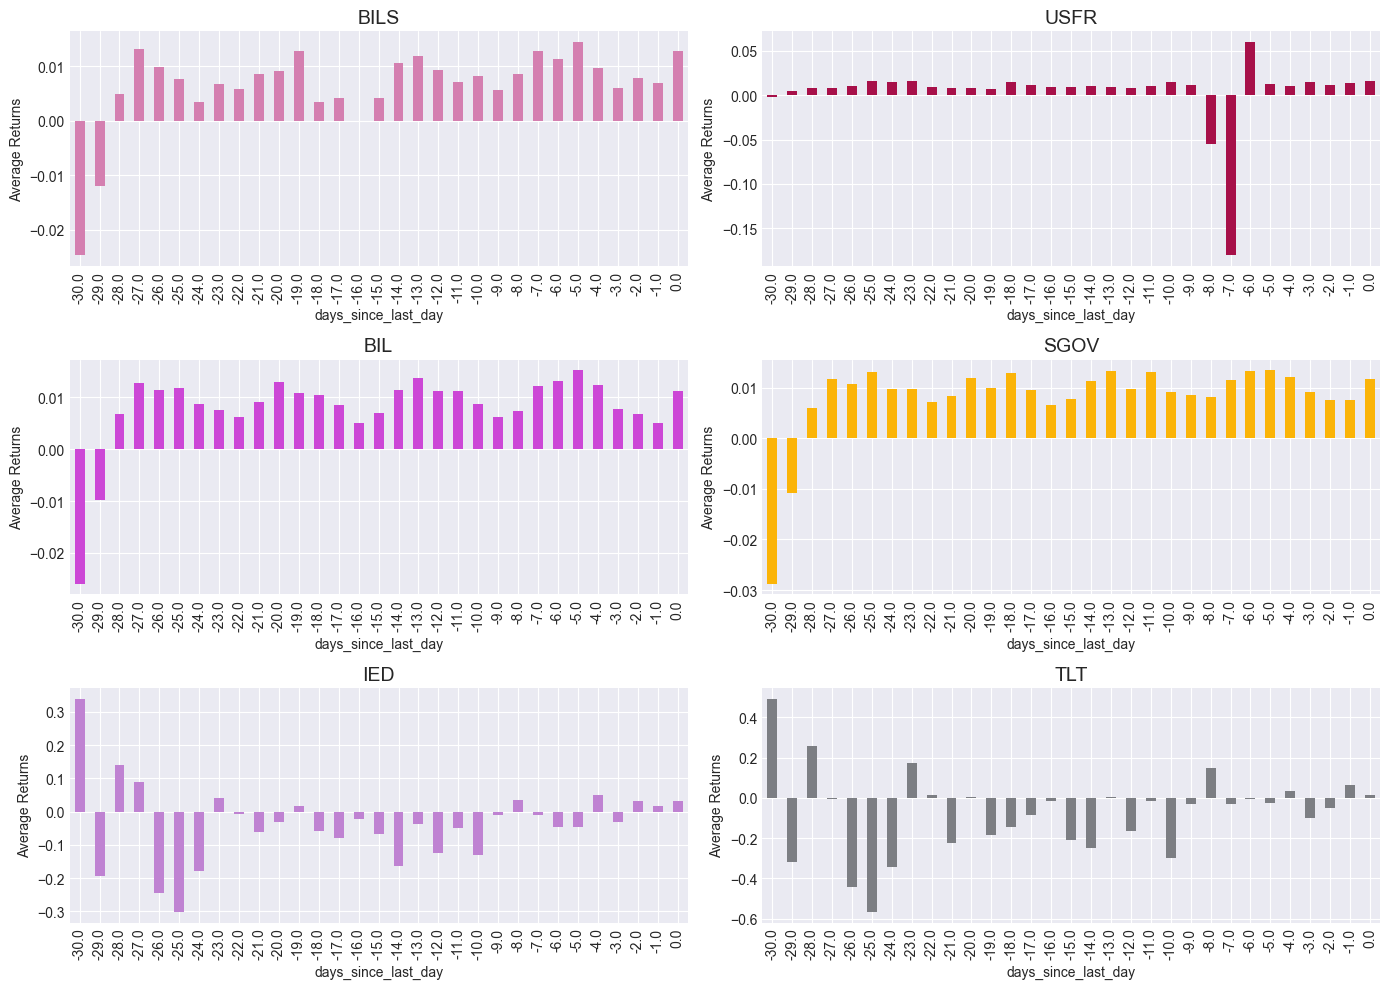

In [113]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(7*2, 5*2))

inst_list = ['BILS', 'USFR', 'BIL', 'SGOV', 'IED', 'TLT']
i = 1

for col in inst_list:
    # Add the subplot
    sub = fig.add_subplot(3, 2, i)
    i = i+1
    # Set title
    sub.set_title(col, fontsize=14)
    # Plot
    r = random.random()
    b = random.random()
    g = random.random()
    (data.groupby('days_since_last_day')[col].mean()*100).plot.bar(color=(r, g, b))
    sub.set_ylabel('Average Returns')

plt.tight_layout()
plt.show()

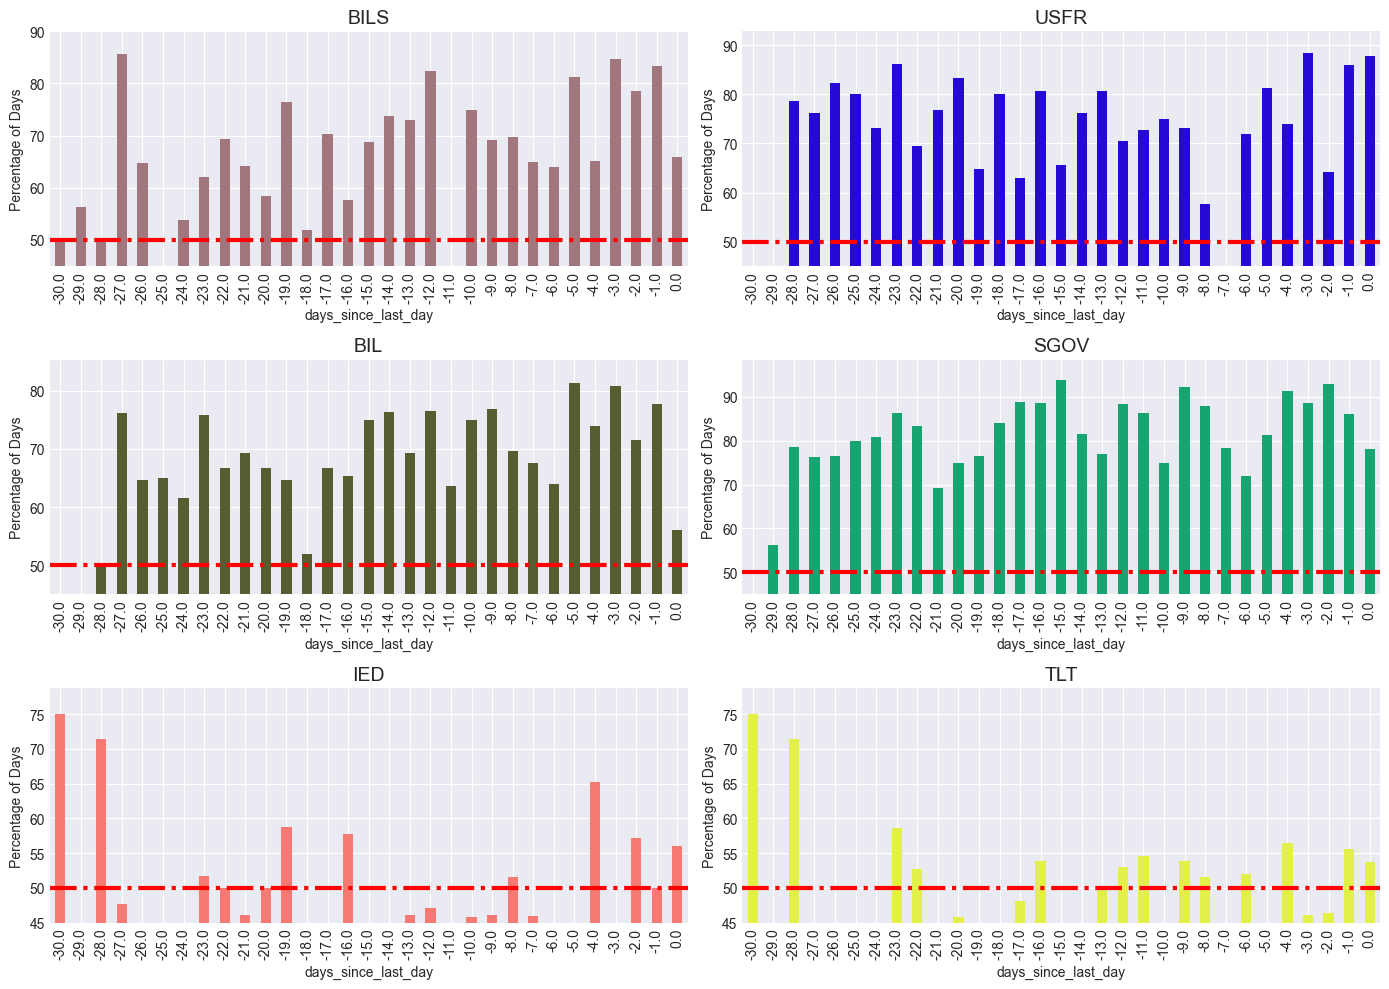

In [114]:
data_replica = data.copy()
fig = plt.figure(figsize=(7*2, 5*2))
i = 1

for col in inst_list:
    data_replica[col] = np.where(data_replica[col] > 0, 1, 0)
    days_gt_than_zero_returns = data_replica.groupby(
        'days_since_last_day')[col].sum()
    total_days = data_replica.groupby('days_since_last_day')[col].count()
    percent_days_positive_returns = 100*days_gt_than_zero_returns/total_days

    # Add the subplot
    sub = fig.add_subplot(3, 2, i)
    i = i+1
    r = random.random()
    b = random.random()
    g = random.random()
    percent_days_positive_returns.plot.bar(color=(r, g, b))
    
    # Set title, ylimit and horizontal line at 50% mark
    sub.set_title(col, fontsize=14)
    sub.set_ylim(45)
    sub.set_ylabel('Percentage of Days')
    sub.axhline(50, color='r', linestyle='dashdot', linewidth=3)

plt.tight_layout()
plt.show()


/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BILS:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         TY     0.002075      0.062579
2021-04-09         TY     0.002037      0.077531
2021-04-12         TY     0.002089      0.063379
2021-04-13         TY     0.002342      0.097503
2021-04-14         TY     0.002094      0.033442
...               ...          ...           ...
2024-05-23        SFR     0.074605     -0.092885
2024-05-24        SFR     0.073953     -0.086491
2024-05-28        SFR     0.069740     -0.030248
2024-05-29        SFR     0.068090     -0.064479
2024-05-30        SFR     0.065838     -0.061114

[745 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for USFR:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         WN     0.000383      0.056030
2021-04-09         WN     0.000410      0.068837
2021-04-12         WN     0.000414      0.079351
2021-04-13         WN     0.000150      0.025403
2021-04-14         TU    -0.001465      0.058454
...               ...          ...           ...
2024-05-23         US    -0.016793     -0.204500
2024-05-24        SFR     0.151163     -0.233136
2024-05-28         US    -0.001304     -0.207184
2024-05-29         US    -0.005263     -0.199956
2024-05-30         TU    -0.005198     -0.205310

[745 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BIL:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         FV     0.000985     -0.575918
2021-04-09         FV     0.000983     -0.556541
2021-04-12         FV     0.001026     -0.559464
2021-04-13         FV     0.001039     -0.548510
2021-04-14         FV     0.000904     -0.595798
...               ...          ...           ...
2024-05-23         FV     0.006659     -0.039429
2024-05-24         FV     0.006717     -0.039748
2024-05-28         FV     0.006033      0.004866
2024-05-29         FV     0.004848     -0.023569
2024-05-30         WN     0.002373     -0.021541

[745 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for SGOV:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         FV     0.006699      0.051376
2021-04-09         FV     0.006640      0.047532
2021-04-12         FV     0.007226      0.018285
2021-04-13         FV     0.006787      0.049986
2021-04-14         FV     0.006560      0.044400
...               ...          ...           ...
2024-05-23         FV     0.009302     -0.029173
2024-05-24        SFR     0.015262     -0.028663
2024-05-28         FV     0.008664      0.027854
2024-05-29         FV     0.007478     -0.006717
2024-05-30         FV     0.007613     -0.005566

[745 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for IED:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         US     0.552947     -0.045569
2021-04-09         US     0.557562     -0.016883
2021-04-12         US     0.558048     -0.027940
2021-04-13         US     0.558743     -0.025112
2021-04-14         US     0.569323     -0.023744
...               ...          ...           ...
2024-05-23         TU     3.280810      0.273895
2024-05-24         TU     3.280079      0.277696
2024-05-28         TU     3.339821      0.275447
2024-05-29         TU     3.322997      0.194167
2024-05-30         TU     3.372982      0.155518

[745 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for TLT:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-04-08         US     1.357237     -0.090405
2021-04-09         US     1.369306     -0.069068
2021-04-12         US     1.369535     -0.072427
2021-04-13         US     1.350632     -0.084804
2021-04-14         WN     0.933028     -0.086104
...               ...          ...           ...
2024-05-23         TU     5.516805      0.219832
2024-05-24         TU     5.489577      0.227895
2024-05-28         TU     5.690936      0.219216
2024-05-29         TU     5.620550      0.131890
2024-05-30         TU     5.743338      0.098271

[745 rows x 3 columns]


     Cumulative Return                                Total Excess Return  \
BILS          0.068726  2021-04-08 00:00:00    0.0
2021-04-09 00:00:00...   
USFR          0.011513  2021-04-08 00:00:00    0.0
2021-04-09 00:00:00...   
BIL           0.074763  2021-04-08 00:00:00    0.0
2021-04-09 00:00:00...   

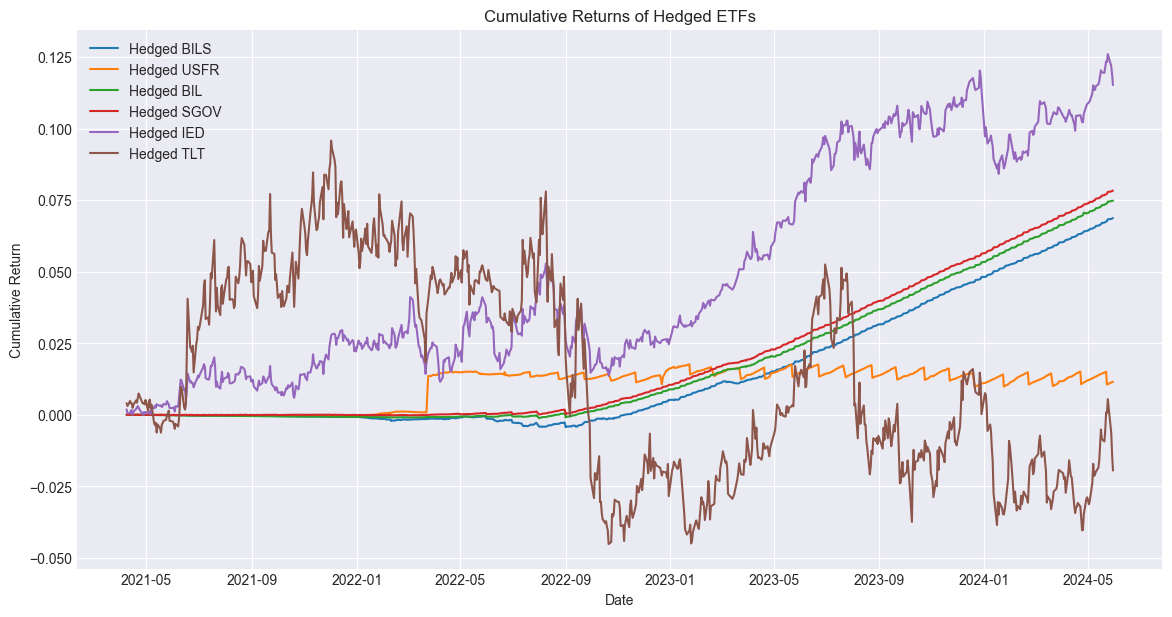

In [203]:
import statsmodels.api as sm
futures = ['FV', 'SFR', 'TU', 'TY', 'US', 'WN']
etfs = ['BILS', 'USFR', 'BIL', 'SGOV', 'IED', 'TLT']
window_size = 60

# 初始化存储对冲后收益率的DataFrame
hedged_returns = pd.DataFrame(index=data.index)

# 计算滚动窗口内的对冲比率并应用对冲策略
for etf in etfs:
    best_assets = []
    best_hedge_ratios = []
    rolling_sharpe_ratios = []
    
    for i in range(window_size, len(data)):
        best_asset = None
        best_hedge_ratio = None
        best_sharpe_ratio = float('-inf')
        
        window_returns = data.iloc[i-window_size:i]
        
        for asset in futures:
            if etf != asset:
                X = sm.add_constant(window_returns[asset])
                model = sm.OLS(window_returns[etf], X).fit()
                hedge_ratio = model.params[1]
                hedged_returns_window = window_returns[etf] - hedge_ratio * window_returns[asset]
                
                # 将 hedged_returns_window 和 Rf 对齐
                hedged_returns_window = hedged_returns_window - window_returns['Rf']
                
                excess_returns = hedged_returns_window
                daily_volatility = excess_returns.std()
                
                # 计算日均超额收益
                mean_excess_return = np.mean(excess_returns)
                if daily_volatility != 0:  # 避免除以零
                    sharpe_ratio = mean_excess_return / daily_volatility
                else:
                    sharpe_ratio = float('-inf')
                
                if sharpe_ratio > best_sharpe_ratio:
                    best_sharpe_ratio = sharpe_ratio
                    best_hedge_ratio = hedge_ratio
                    best_asset = asset
        
        best_assets.append(best_asset)
        best_hedge_ratios.append(best_hedge_ratio)
        rolling_sharpe_ratios.append(best_sharpe_ratio)
        hedged_returns.loc[data.index[i], etf] = data.loc[data.index[i], etf] - best_hedge_ratio * data.loc[data.index[i], best_asset]


    optimal_hedge_ratios = pd.DataFrame({
        'Best Asset': best_assets,
        'Hedge Ratio': best_hedge_ratios,
        'Sharpe Ratio': rolling_sharpe_ratios
    }, index=data.index[window_size:])
    
    print(f'Optimal Hedge Ratios for {etf}:')
    print(optimal_hedge_ratios)
    print('\n')

# 计算策略表现指标
def calculate_performance(returns, rf):
    cumulative_return = (1 + returns).cumprod() - 1
    excess_returns = returns - rf
    total_excess_return = excess_returns.sum()
    mean_excess_return = excess_returns.mean()
    daily_volatility = excess_returns.std()
    sharpe_ratio = mean_excess_return / daily_volatility
    sharpe_ratio[daily_volatility == 0] = float('-inf')
    return cumulative_return, total_excess_return, daily_volatility, sharpe_ratio

performance_metrics = {}
rf_series = data
['Rf']

for etf in hedged_returns.columns:
    hedged_etf_returns = hedged_returns[etf].dropna()
    rf_for_period = rf_series.loc[hedged_etf_returns.index]
    cumulative_return, total_excess_return, daily_volatility, sharpe_ratio = calculate_performance(hedged_etf_returns, rf_for_period)
    performance_metrics[etf] = {
        'Cumulative Return': cumulative_return[-1],
        'Total Excess Return': total_excess_return,
        'Daily Volatility': daily_volatility,
        'Sharpe Ratio': sharpe_ratio
    }

performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# 可视化累计收益
plt.figure(figsize=(14, 7))
for etf in hedged_returns.columns:
    cumulative_return = (1 + hedged_returns[etf].dropna()).cumprod() - 1
    plt.plot(cumulative_return, label=f'Hedged {etf}')

plt.title('Cumulative Returns of Hedged ETFs')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [204]:
hedged_returns.index = pd.to_datetime(hedged_returns.index, format='%Y-%m-%d')
hedged_returns['month'] = hedged_returns.index.month 
hedged_returns['is_last_day'] = hedged_returns.month!= hedged_returns.month.shift(-1)
hedged_returns = hedged_returns[:-1]

# Store the last date of the month
hedged_returns['last_date_of_month'] = np.where(hedged_returns.is_last_day, hedged_returns.index.day, np.nan) 
hedged_returns.last_date_of_month = hedged_returns.last_date_of_month.fillna(method='bfill')

hedged_returns['days_since_last_day'] = hedged_returns.index.day - hedged_returns.last_date_of_month
hedged_returns.dropna(inplace=True)
hedged_returns

,BILS,USFR,BIL,SGOV,IED,TLT,month,is_last_day,last_date_of_month,days_since_last_day
Date,,,,,,,,,,
2021-04-08,0.000002,0.000021,-6.248261e-07,-0.000008,0.001849,0.004024,4,False,30.0,-22.0
2021-04-09,-0.000015,-0.000013,-9.149844e-06,-0.000091,-0.001359,-0.000978,4,False,30.0,-21.0
2021-04-12,-0.000007,0.000014,-2.253721e-06,0.000106,0.000068,0.001771,4,False,30.0,-18.0
2021-04-13,-0.000034,-0.000027,-1.167610e-05,-0.000011,0.000879,-0.000786,4,False,30.0,-17.0
2021-04-14,0.000008,-0.000005,2.929838e-06,0.000018,0.000158,0.000022,4,False,30.0,-16.0
...,...,...,...,...,...,...,...,...,...,...
2024-04-24,0.000126,0.000212,1.497984e-04,0.000153,-0.001145,-0.004595,4,False,30.0,-6.0
2024-04-25,0.000145,0.000255,1.457814e-04,0.000154,-0.000145,0.000063,4,False,30.0,-5.0
2024-04-26,0.000443,0.000155,8.559017e-04,0.000395,0.002677,0.005739,4,False,30.0,-4.0


/var/folders/cd/bqtyvprd4vj1h51yknzspx380000gn/T/ipykernel_36210/2643400873.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


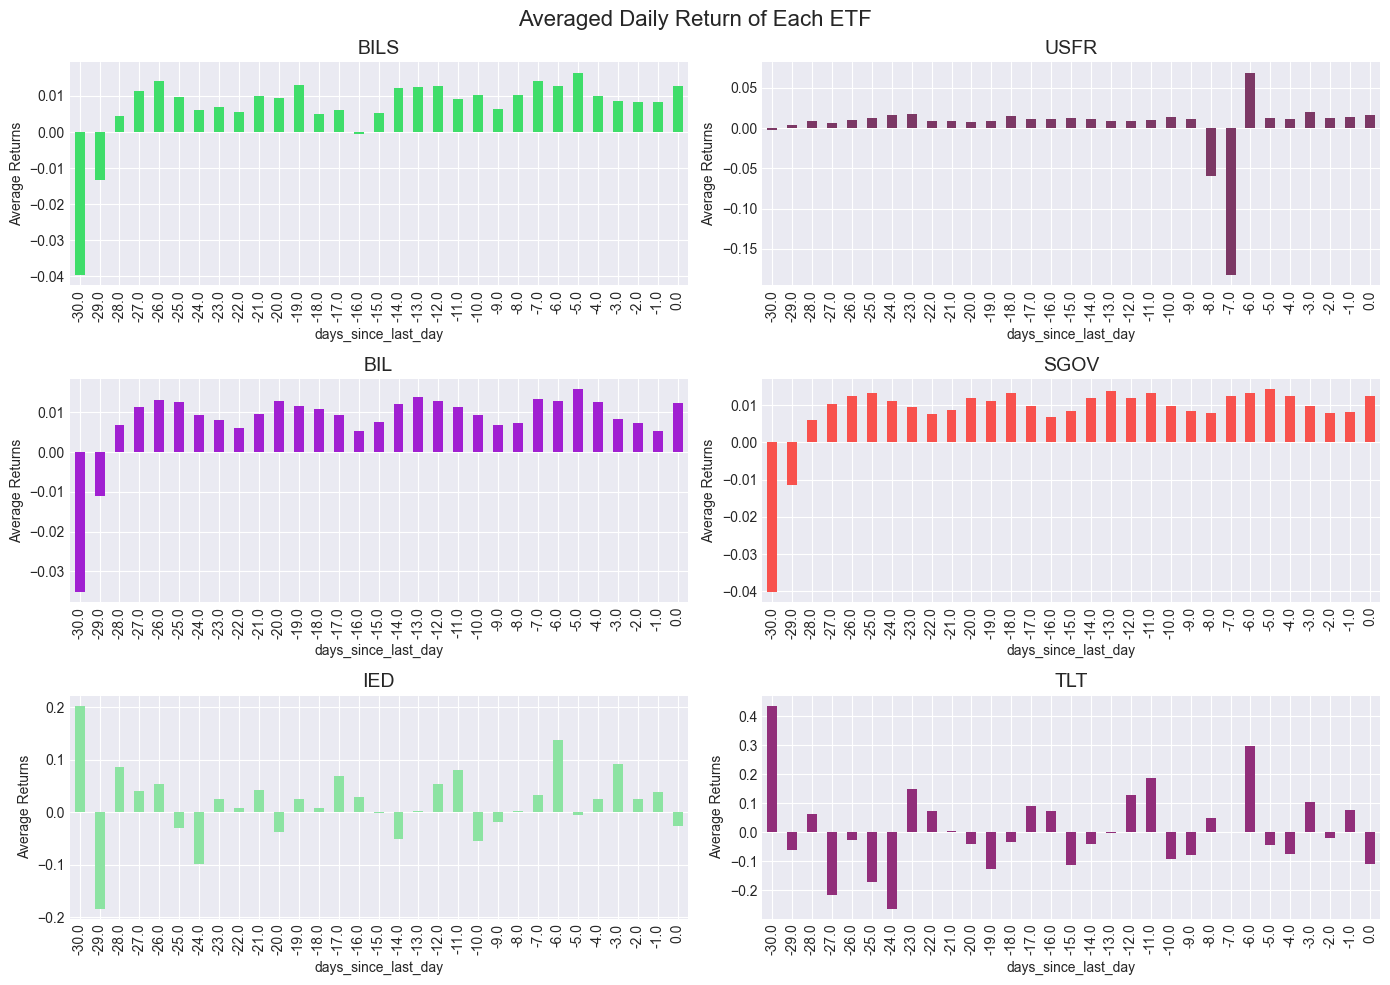

In [220]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(7*2, 5*2))
fig.suptitle('Averaged Daily Return of Each ETF', fontsize=16)

inst_list = ['BILS', 'USFR', 'BIL', 'SGOV', 'IED', 'TLT']
i = 1

for col in inst_list:
    # Add the subplot
    sub = fig.add_subplot(3, 2, i)
    i = i+1
    # Set title
    sub.set_title(col, fontsize=14)
    # Plot
    r = random.random()
    b = random.random()
    g = random.random()
    (hedged_returns.groupby('days_since_last_day')[col].mean()*100).plot.bar(color=(r, g, b))
    sub.set_ylabel('Average Returns')

plt.tight_layout()
plt.show()

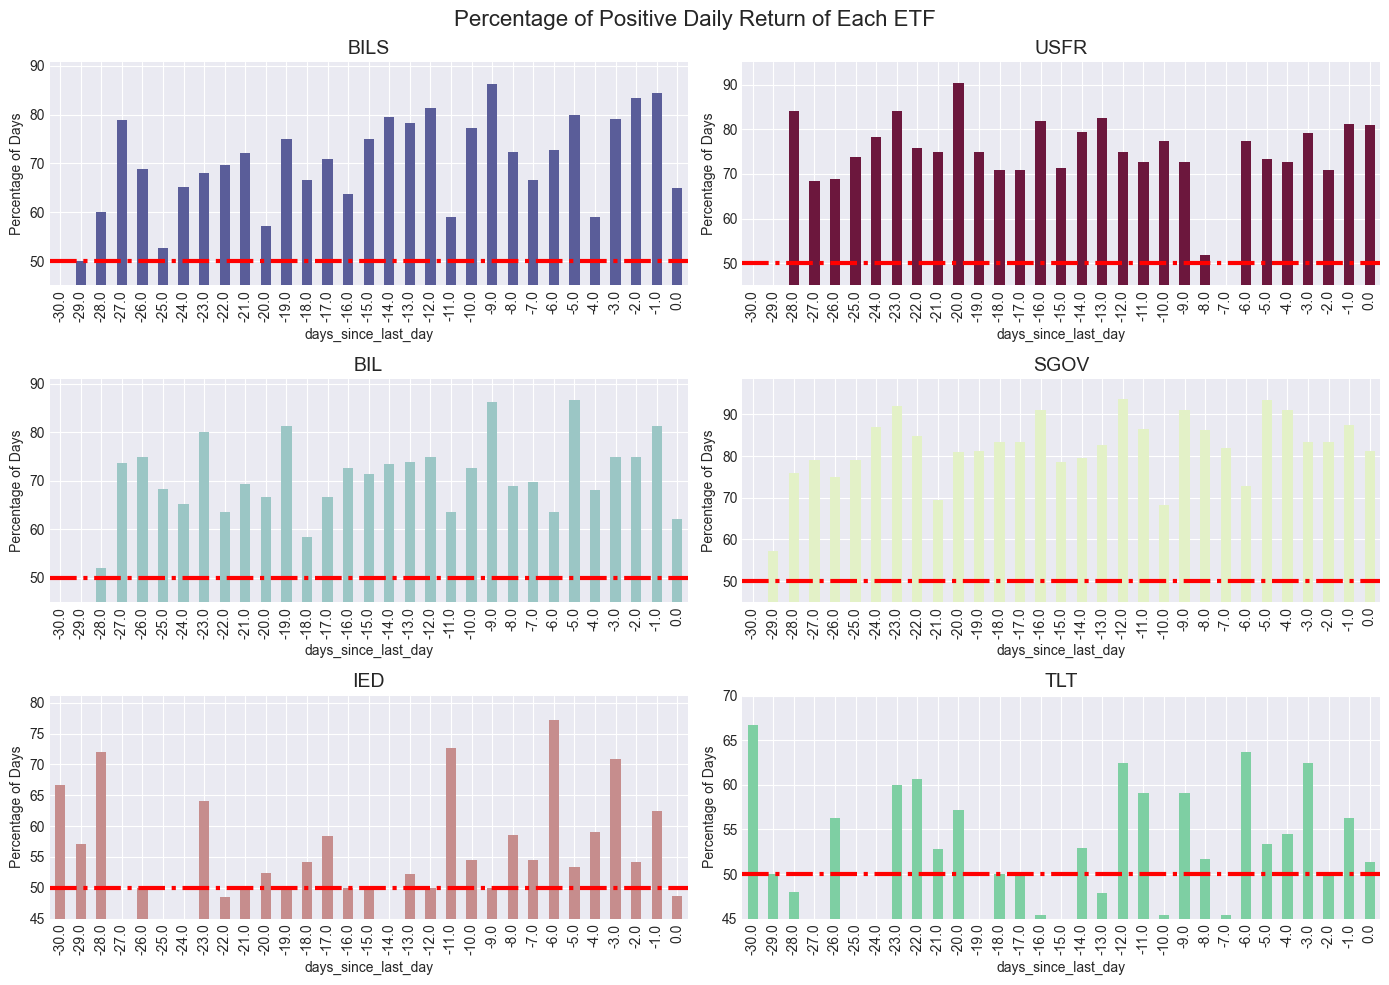

In [221]:
data_replica = hedged_returns.copy()
fig = plt.figure(figsize=(7*2, 5*2))
fig.suptitle('Percentage of Positive Daily Return of Each ETF', fontsize=16)
i = 1

for col in inst_list:
    data_replica[col] = np.where(data_replica[col] > 0, 1, 0)
    days_gt_than_zero_returns = data_replica.groupby(
        'days_since_last_day')[col].sum()
    total_days = data_replica.groupby('days_since_last_day')[col].count()
    percent_days_positive_returns = 100*days_gt_than_zero_returns/total_days

    # Add the subplot
    sub = fig.add_subplot(3, 2, i)
    i = i+1
    r = random.random()
    b = random.random()
    g = random.random()
    percent_days_positive_returns.plot.bar(color=(r, g, b))
    
    # Set title, ylimit and horizontal line at 50% mark
    sub.set_title(col, fontsize=14)
    sub.set_ylim(45)
    sub.set_ylabel('Percentage of Days')
    sub.axhline(50, color='r', linestyle='dashdot', linewidth=3)

plt.tight_layout()
plt.show()

In [216]:
hedged_returns['signal_others'] = np.where(hedged_returns['days_since_last_day'] >= -6, 1, 0)
hedged_returns['signal_TLT_IED'] = np.where(
    (hedged_returns['days_since_last_day'] >= -30) & (hedged_returns['days_since_last_day'] <= -24),
    1,
    0
)
signals = pd.DataFrame({
    'BILS': hedged_returns['signal_others'],
    'USFR':hedged_returns['signal_others'],
    'BIL': hedged_returns['signal_others'],
    'SGOV':hedged_returns['signal_others'],
    'IED': hedged_returns['signal_TLT_IED'],
    'TLT': hedged_returns['signal_TLT_IED']
})
inst_list = ['BILS', 'USFR', 'BIL', 'SGOV', 'IED', 'TLT']
returns = hedged_returns[inst_list].mul(signals[inst_list], axis=0)
returns

,BILS,USFR,BIL,SGOV,IED,TLT
Date,,,,,,
2021-04-08,0.000000,0.000000,-0.000000,-0.000000,0.0,0.0
2021-04-09,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0
2021-04-12,-0.000000,0.000000,-0.000000,0.000000,0.0,0.0
2021-04-13,-0.000000,-0.000000,-0.000000,-0.000000,0.0,-0.0
2021-04-14,0.000000,-0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...
2024-04-24,0.000126,0.000212,0.000150,0.000153,-0.0,-0.0
2024-04-25,0.000145,0.000255,0.000146,0.000154,-0.0,0.0
2024-04-26,0.000443,0.000155,0.000856,0.000395,0.0,0.0


In [222]:
hedged_returns['signal'] = np.where(hedged_returns.days_since_last_day >= -6, 1, 0)
returns = hedged_returns[inst_list].mul(hedged_returns['signal'], axis=0)
returns.head()

,BILS,USFR,BIL,SGOV,IED,TLT
Date,,,,,,
2021-04-08,0.0,0.0,-0.0,-0.0,0.0,0.0
2021-04-09,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2021-04-12,-0.0,0.0,-0.0,0.0,0.0,0.0
2021-04-13,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
2021-04-14,0.0,-0.0,0.0,0.0,0.0,0.0


In [228]:
cumulative_strategy_returns = ((returns + 1).cumprod())
cumulative_returns = cumulative_strategy_returns - 1

total_strategy_returns = (cumulative_strategy_returns.iloc[-1]-1)*100

print('Total Strategy Returns(%):')
total_strategy_returns

Total Strategy Returns(%):


BILS    1.913043
USFR    3.854677
BIL     1.820447
SGOV    1.945453
IED     6.737259
TLT     4.334052
Name: 2024-04-30 00:00:00, dtype: float64

In [232]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
cagr = (cumulative_strategy_returns.iloc[-1]**(252/days)-1)*100

print('The CAGR(%) from strategy is: ')
cagr

The CAGR(%) from strategy is: 


BILS    0.660841
USFR    1.323334
BIL     0.629042
SGOV    0.671967
IED     2.292141
TLT     1.485653
Name: 2024-04-30 00:00:00, dtype: float64

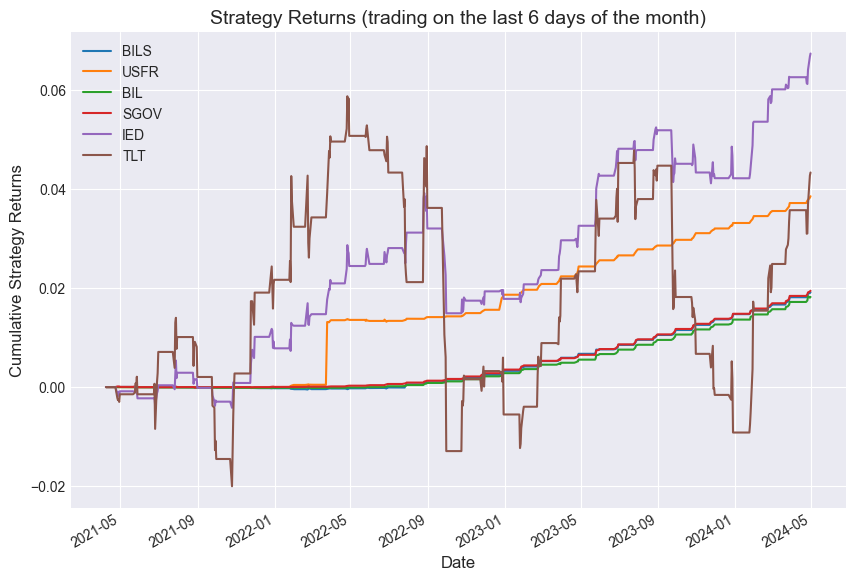

In [227]:
# Plot cumulative strategy returns
cumulative_returns.plot(figsize=(10, 7))

# Define label for the title of the figure
plt.title('Strategy Returns (trading on the last 6 days of the month)', fontsize=14)

# Define labels for x-axis and y-axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Strategy Returns', fontsize=12)

plt.show()

In [231]:
def calc_drawdown(cum_rets):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


drawdown = calc_drawdown(cumulative_strategy_returns)
max_dd = drawdown.min()*100
print('The max Drawndowns(%) is:')
max_dd

The max Drawndowns(%) is:


BILS   -0.052194
USFR   -0.052396
BIL    -0.029865
SGOV   -0.028765
IED    -2.339639
TLT    -6.770047
dtype: float64

In [213]:
drawdown

,BILS,USFR,BIL,SGOV,IED,TLT
Date,,,,,,
2021-04-08,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-04-09,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-04-12,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-04-13,0.0,0.0,0.000000,0.0,0.000000,0.000000
2021-04-14,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...
2024-04-24,0.0,0.0,0.000000,0.0,-0.001227,-0.026233
2024-04-25,0.0,0.0,0.000000,0.0,-0.001371,-0.026171
2024-04-26,0.0,0.0,0.000000,0.0,0.000000,-0.020583


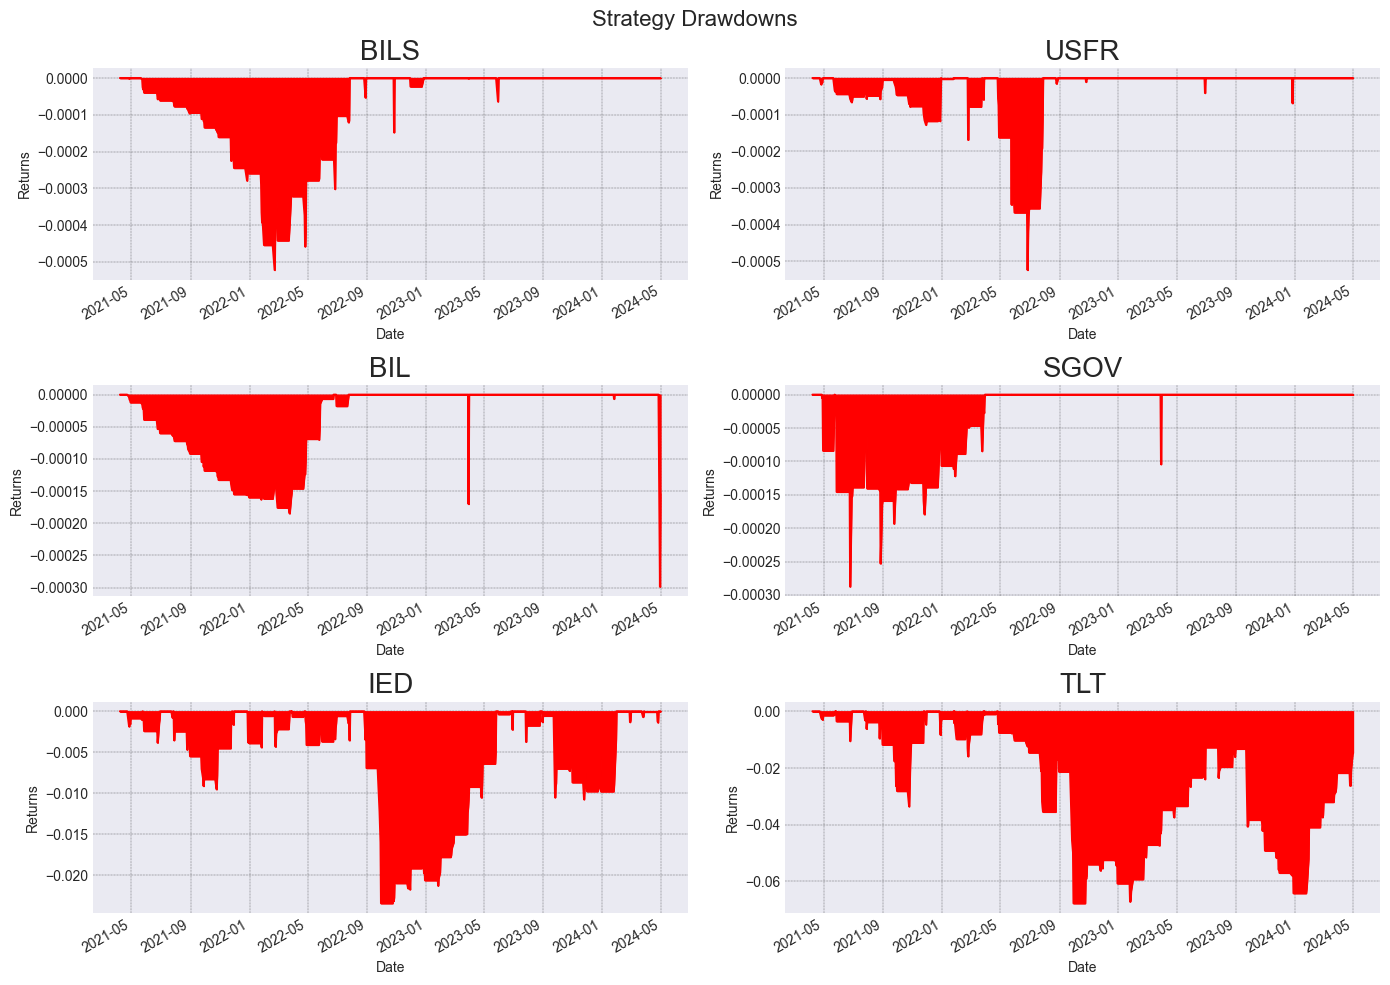

In [226]:
def plot_drawdown(drawdown):
    fig = plt.figure(figsize=(7*2, 5*2))
    fig.suptitle('Strategy Drawdowns', fontsize=16)
    i = 1
    for col in drawdown.columns:
        # Add the subplot
        sub = fig.add_subplot(3, 2, i)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot

        drawdown[col].plot(color='r')
        sub.set_ylabel('Returns')
        sub.fill_between(drawdown.index, drawdown[col], color='red')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)

    plt.tight_layout()
    
    plt.show()


plot_drawdown(drawdown)